In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from datetime import date, datetime
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_df = pd.read_csv('train.csv',parse_dates=['Open Date'])
test_df = pd.read_csv('test.csv',parse_dates=['Open Date'])

In [70]:
train_df.head()

,City Group,Type,revenue,pca1,pca2,pca3,pca4,pca5,pca6,pca7,...,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,launch_days
0,1,2,5653753.0,0.243606,-0.527510,-0.045521,-0.206594,-0.125026,-0.156500,-0.459656,...,0.016193,0.031345,0.059000,0.016255,0.048220,-0.054702,0.029028,0.026632,0.042975,0.776071
1,1,3,6923131.0,-0.471515,0.170770,0.177746,-0.226293,-0.126229,-0.005320,0.031018,...,-0.005679,-0.007500,0.028185,-0.009157,-0.021811,0.022046,0.036122,0.031528,0.001586,0.317683
2,0,2,2055379.0,-0.597651,0.198493,-0.333930,-0.040836,-0.090928,-0.048445,-0.010434,...,0.052252,-0.007101,-0.063996,-0.037576,0.019852,-0.075007,-0.016819,-0.039074,-0.020373,0.047097
3,0,2,2675511.0,2.482674,0.059977,-0.910912,-0.065020,0.209007,-0.047805,-0.620737,...,0.103718,0.204524,-0.020188,0.117540,-0.107868,0.034265,0.003802,-0.079669,0.205567,0.105748
4,0,2,4316715.0,-0.009296,-0.450832,-0.315341,-0.238763,-0.087733,-0.043797,-0.052456,...,0.033759,0.020665,-0.008124,0.040790,0.154162,0.000591,-0.001348,-0.038915,-0.049402,0.251865


In [3]:
train_df.shape, test_df.shape

((137, 43), (100000, 42))

In [4]:
train_df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [5]:
test_df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,4.088030,4.428085,4.215325,4.396025,1.989590,2.881900,5.30051,4.93100,5.251380,...,3.233785,3.084000,2.083300,1.193330,1.942640,0.987430,2.108670,1.832830,1.968890,0.973500
std,28867.657797,2.812963,1.428865,0.842161,1.035827,1.065314,1.531429,2.17858,1.71849,1.702632,...,2.136694,1.783927,4.309479,2.307944,3.971298,1.534808,4.685414,3.228769,3.805773,1.677267
min,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.00000,1.00000,4.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24999.750000,2.000000,3.750000,4.000000,4.000000,1.000000,2.000000,5.00000,4.00000,4.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49999.500000,3.000000,5.000000,4.000000,4.000000,2.000000,2.000000,5.00000,5.00000,5.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74999.250000,4.000000,5.000000,4.000000,5.000000,2.000000,4.000000,5.00000,5.00000,5.000000,...,4.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000
max,99999.000000,15.000000,7.500000,6.000000,7.500000,6.000000,10.000000,10.00000,10.00000,10.000000,...,12.500000,10.000000,25.000000,15.000000,25.000000,6.000000,30.000000,15.000000,20.000000,8.000000


In [6]:
train_df.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [7]:
test_df.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
dtype: int64

In [8]:
def print_cols():
    print(train_df.columns)

In [9]:
print_cols()

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')


<AxesSubplot:xlabel='revenue'>

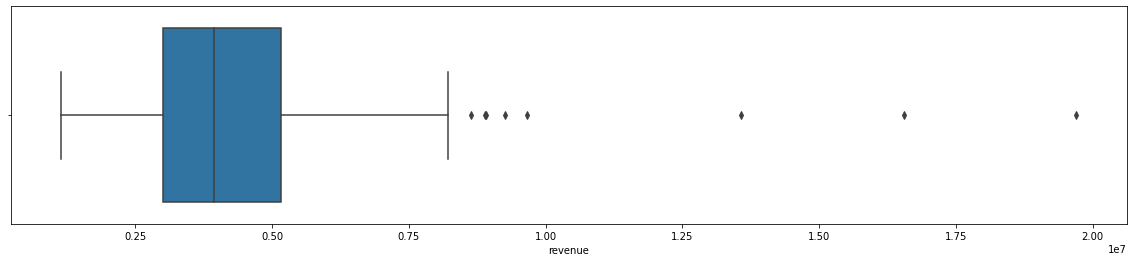

In [10]:
plt.figure(figsize=(20,4))
sns.boxplot(x='revenue',data=train_df)

In [11]:
from scipy.stats import iqr

In [12]:
upper_limit = train_df.revenue.quantile(0.75) + (1.5* iqr(train_df.revenue))
lower_limit = train_df.revenue.quantile(0.25)- (1.5* iqr(train_df.revenue))

In [13]:
condition = (train_df.revenue > upper_limit) | (train_df.revenue<lower_limit)
train_df[condition]

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
16,16,2000-01-07,İstanbul,Big Cities,FC,3,5.0,4.0,4.0,2,...,2.0,0,0,0,0,0,0,0,0,19696939.0
24,24,2009-09-20,İstanbul,Big Cities,IL,5,5.0,3.0,5.0,2,...,2.0,5,5,4,4,4,4,5,2,8904084.0
49,49,2008-04-01,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,2,...,7.5,0,0,0,0,0,0,0,0,8630682.0
75,75,2005-10-15,İstanbul,Big Cities,FC,5,5.0,4.0,5.0,1,...,0.0,0,0,0,0,0,0,0,0,16549064.0
99,99,1999-12-18,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,1.0,5,5,4,2,5,5,5,3,13575224.0
100,100,2007-09-21,İstanbul,Big Cities,FC,3,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9652350.0
116,116,2012-03-30,İzmir,Big Cities,FC,2,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,8894598.0
133,133,2006-10-12,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0


In [14]:
rev_filter = (train_df.revenue < 10000000)
train_df = train_df[rev_filter]

In [15]:
train_df.shape

(134, 43)

In [16]:
len(train_df.Id.unique()) == train_df.shape[0]

True

In [17]:
len(test_df.Id.unique()) == test_df.shape[0]

True

In [18]:
train_df.drop('Id',axis=1,inplace=True)
test_df.drop('Id', axis=1, inplace=True)

In [19]:
train_df.shape, test_df.shape

((134, 42), (100000, 41))

In [20]:
train_df['City Group'].value_counts()

Big Cities    75
Other         59
Name: City Group, dtype: int64

<AxesSubplot:xlabel='City Group', ylabel='revenue'>

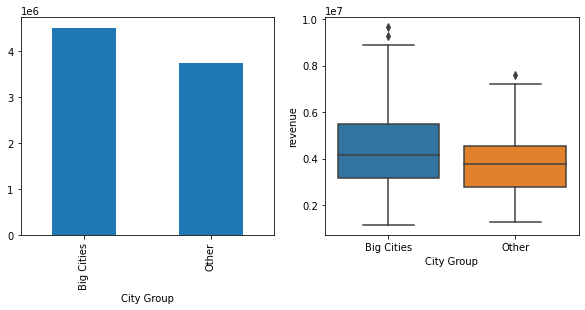

In [21]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
train_df.groupby(['City Group']).mean()['revenue'].plot.bar(ax=ax1)
sns.boxplot(x='City Group',y='revenue', data=train_df,ax=ax2)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'Adana'),
  Text(0, 1, 'Afyonkarahisar'),
  Text(0, 2, 'Amasya'),
  Text(0, 3, 'Ankara'),
  Text(0, 4, 'Antalya'),
  Text(0, 5, 'Aydın'),
  Text(0, 6, 'Balıkesir'),
  Text(0, 7, 'Bolu'),
  Text(0, 8, 'Bursa'),
  Text(0, 9, 'Denizli'),
  Text(0, 10, 'Diyarbakır'),
  Text(0, 11, 'Edirne'),
  Text(0, 12, 'Elazığ'),
  Text(0, 13, 'Eskişehir'),
  Text(0, 14, 'Gaziantep'),
  Text(0, 15, 'Isparta'),
  Text(0, 16, 'Karabük'),
  Text(0, 17, 'Kastamonu'),
  Text(0, 18, 'Kayseri'),
  Text(0, 19, 'Kocaeli'),
  Text(0, 20, 'Konya'),
  Text(0, 21, 'Kütahya'),
  Text(0, 22, 'Kırklareli'),
  Text(0, 23, 'Muğla'),
  Text(0, 24, 'Osmaniye'),
  Text(0, 25, 'Sakarya'),
  Text(0, 26, 'Samsun'),
  Text(0, 27, 'Tekirdağ'),
  Text(0, 28, 'Tokat'),
  Text(0, 29, 'Trabzon'),
  Text(0, 30, 'Uşak'),
  Text(0, 31, 'İstanbul'),
  Text(0, 32, 'İzmir'),

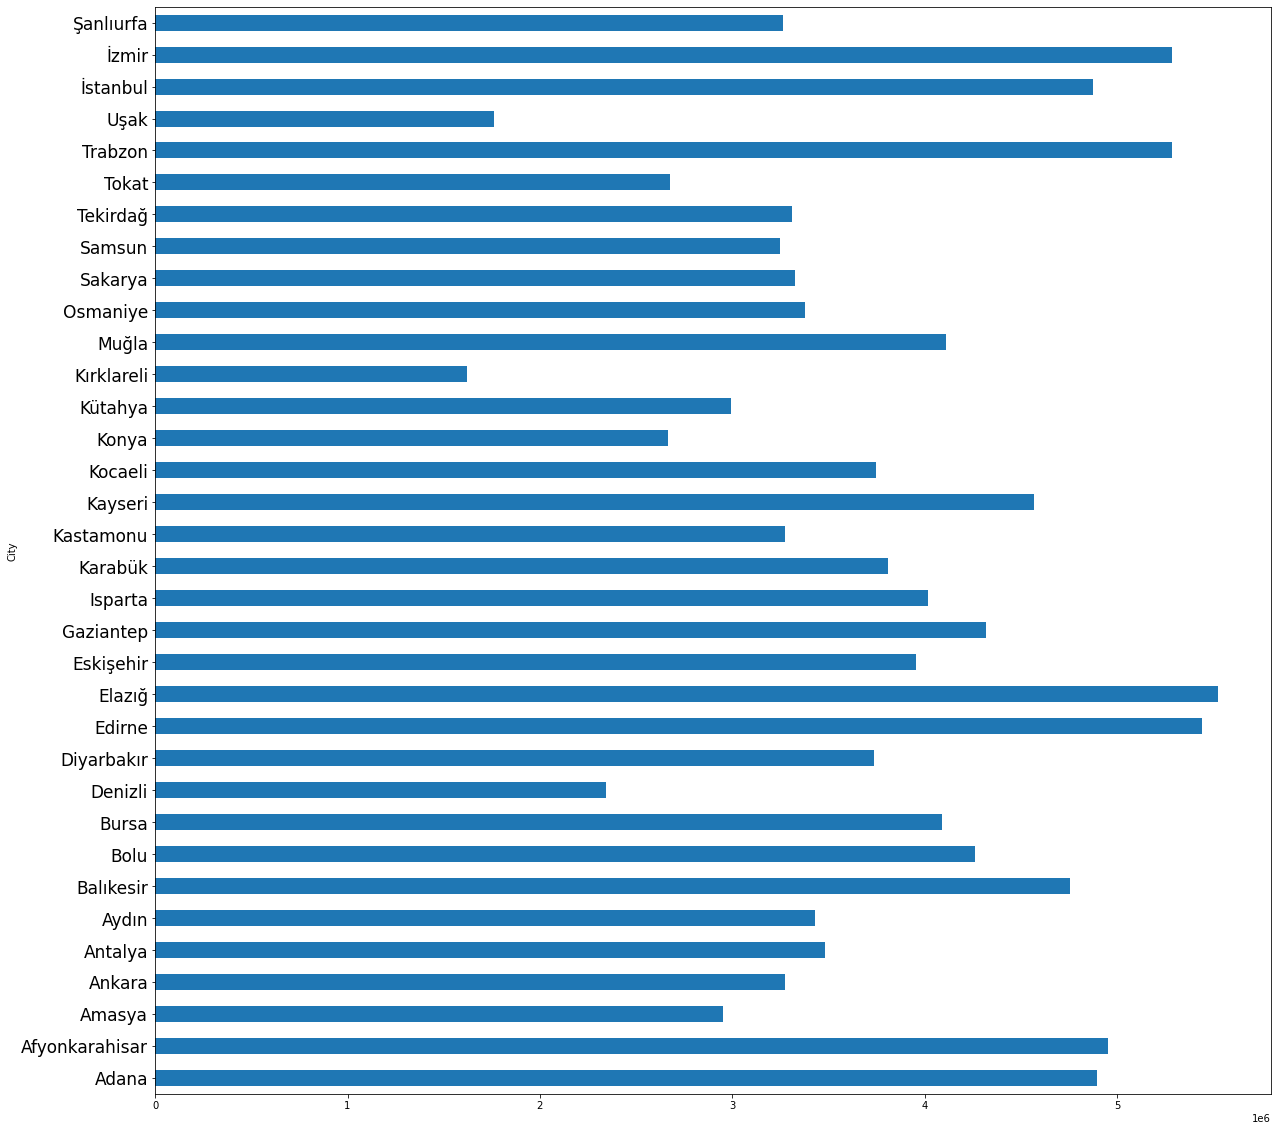

In [22]:
train_df.groupby(['City']).mean()['revenue'].plot.barh(figsize=(20,20))
plt.yticks(fontsize=17)

In [23]:
len(train_df.City.unique()) ,len(test_df.City.unique())

(34, 57)

In [24]:
train_df.drop('City',axis=1,inplace=True)
test_df.drop('City',axis=1,inplace=True)

In [25]:
print_cols()

Index(['Open Date', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6',
       'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'revenue'],
      dtype='object')


In [26]:
train_df.Type.value_counts()

FC    74
IL    59
DT     1
Name: Type, dtype: int64

In [27]:
train_df.loc[124,'Type'] = 'IL'

In [28]:
test_df.Type.value_counts()

FC    57019
IL    40447
DT     2244
MB      290
Name: Type, dtype: int64

D:\Virtual_Environments\fer\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


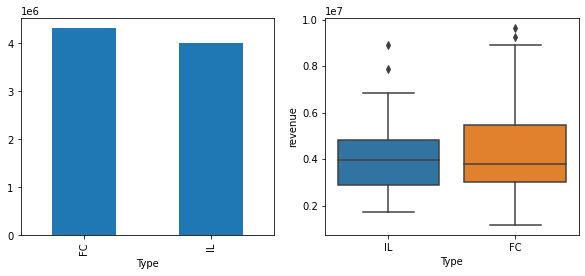

In [29]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
train_df.groupby(['Type']).mean()['revenue'].plot.bar(ax=ax1)
sns.boxplot(train_df.Type, train_df.revenue,ax=ax2)
plt.show()

In [30]:
train_df.P1.value_counts()

2     36
4     34
3     30
12    12
1      9
6      6
9      4
5      3
Name: P1, dtype: int64

In [31]:
train_df.head()

,Open Date,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,1999-07-17,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,2008-02-14,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2013-03-09,Other,IL,2,4.0,2.0,5.0,2,3,5,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,2012-02-02,Other,IL,6,4.5,6.0,6.0,4,4,10,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,2009-05-09,Other,IL,3,4.0,3.0,4.0,2,2,5,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [32]:
test_df.head()

,Open Date,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,2011-01-22,Other,FC,1,4.0,4.0,4.0,1,2,5,...,2.0,3.0,0,0,0,0,0,0,0,0
1,2011-03-18,Other,IL,3,4.0,4.0,4.0,2,2,5,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2013-10-30,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,...,2.0,3.0,0,0,0,0,0,0,0,0
3,2013-05-06,Other,IL,2,4.0,4.0,4.0,2,3,5,...,2.0,3.0,0,4,0,0,0,0,0,0
4,2013-07-31,Other,FC,2,4.0,4.0,4.0,1,2,5,...,5.0,3.0,0,0,0,0,0,0,0,0


In [33]:
comp_df = pd.concat([train_df, test_df])
comp_df.reset_index(drop=True, inplace=True)

In [34]:
comp_df.Type.value_counts(),comp_df['City Group'].value_counts()

(FC    57093
 IL    40507
 DT     2244
 MB      290
 Name: Type, dtype: int64,
 Other         50787
 Big Cities    49347
 Name: City Group, dtype: int64)

In [35]:
comp_df.Type = comp_df.Type.map({'MB':0,'DT':1, 'IL':2,'FC':3})
comp_df['City Group'] = comp_df['City Group'].map({'Big Cities':1, 'Other':0})

In [36]:
comp_df.head(3)

,Open Date,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,1999-07-17,1,2,4,5.0,4.0,4.0,2,2,5,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,2008-02-14,1,3,4,5.0,4.0,4.0,1,2,5,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2013-03-09,0,2,2,4.0,2.0,5.0,2,3,5,...,3.0,0,0,0,0,0,0,0,0,2055379.0


In [37]:
p_name = ['P'+str(i) for i in range(1,38)]
comp_df[p_name] = MinMaxScaler().fit_transform(comp_df[p_name])

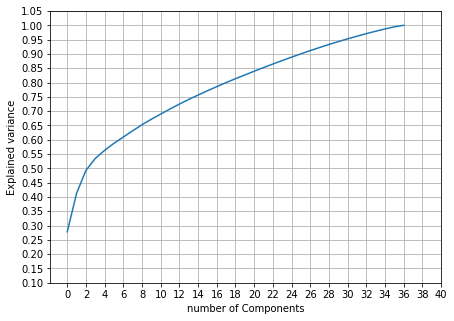

In [38]:
from sklearn.decomposition import PCA
pca = PCA().fit(comp_df[p_name])
plt.figure(figsize=(7,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of Components')
plt.ylabel('Explained variance')
plt.yticks(np.arange(0.1,1.1,0.05))
plt.xticks(np.arange(0,41,2))
plt.grid(True)

In [39]:
pca_list = ['pca'+str(i) for i in range(1,30,1)]
comp_df[pca_list] = PCA(n_components=29).fit_transform(comp_df[p_name])
comp_df.drop(p_name,axis=1,inplace=True)

In [40]:
comp_df

,Open Date,City Group,Type,revenue,pca1,pca2,pca3,pca4,pca5,pca6,...,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29
0,1999-07-17,1,2,5653753.0,0.243606,-0.527510,-0.045521,-0.206594,-0.125026,-0.156500,...,-0.037017,0.016193,0.031345,0.059000,0.016255,0.048220,-0.054702,0.029028,0.026632,0.042975
1,2008-02-14,1,3,6923131.0,-0.471515,0.170770,0.177746,-0.226293,-0.126229,-0.005320,...,0.012382,-0.005679,-0.007500,0.028185,-0.009157,-0.021811,0.022046,0.036122,0.031528,0.001586
2,2013-03-09,0,2,2055379.0,-0.597651,0.198493,-0.333930,-0.040836,-0.090928,-0.048445,...,-0.030305,0.052252,-0.007101,-0.063996,-0.037576,0.019852,-0.075007,-0.016819,-0.039074,-0.020373
3,2012-02-02,0,2,2675511.0,2.482674,0.059977,-0.910912,-0.065020,0.209007,-0.047805,...,-0.164486,0.103718,0.204524,-0.020188,0.117540,-0.107868,0.034265,0.003802,-0.079669,0.205567
4,2009-05-09,0,2,4316715.0,-0.009296,-0.450832,-0.315341,-0.238763,-0.087733,-0.043797,...,0.003893,0.033759,0.020665,-0.008124,0.040790,0.154162,0.000591,-0.001348,-0.038915,-0.049402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100129,2000-01-05,0,3,NaN,-0.564011,0.026138,0.264120,0.067066,-0.129262,-0.057341,...,-0.000809,-0.107038,-0.010477,-0.065874,0.054019,-0.052606,0.050158,-0.005580,-0.009870,-0.003340
100130,2011-07-18,0,2,NaN,-0.772675,-0.044185,-0.426603,-0.085292,0.355638,0.134581,...,0.033197,-0.109380,0.035997,-0.024443,0.009493,-0.027342,0.082202,0.061054,-0.038440,0.029170
100131,2012-12-29,1,2,NaN,0.337268,-0.730569,0.574532,-0.031514,0.149053,-0.088512,...,0.017510,0.043300,-0.057064,0.070481,-0.060259,0.081257,0.016498,-0.029885,-0.022418,0.005533
100132,2013-10-12,1,3,NaN,1.344066,1.422243,0.143795,-0.202669,-0.163206,-0.073804,...,0.056199,-0.021769,0.003462,0.032151,-0.146600,-0.144739,-0.049876,-0.174633,-0.069845,-0.027478


In [41]:
import datetime
comp_df['launch_days'] = (datetime.datetime.now() - comp_df[['Open Date']])
comp_df['launch_days'] = comp_df['launch_days'].dt.days

In [42]:
comp_df.drop('Open Date',axis=1,inplace=True)

In [43]:
comp_df['launch_days'] = MinMaxScaler().fit_transform(comp_df[['launch_days']])

In [44]:
test_df = comp_df[comp_df['revenue'].isnull()]
train_df = comp_df[comp_df['revenue'].notnull()]
test_df.drop('revenue',axis=1, inplace=True)

C:\Users\mohit\AppData\Local\Temp\ipykernel_14232\2965048820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop('revenue',axis=1, inplace=True)


In [45]:
train_df.shape, test_df.shape

((134, 33), (100000, 32))

In [46]:
x_train = train_df.drop('revenue',axis=1)
y_train = train_df['revenue']

In [47]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, cross_validate, RepeatedKFold

In [48]:
cv = RepeatedKFold(n_splits=10, n_repeats=3)
scores = cross_validate(LGBMRegressor(), x_train,y_train, scoring=['r2','neg_root_mean_squared_error'],cv=cv)

In [49]:
r2 = scores['test_r2']
rmse = scores['test_neg_root_mean_squared_error']
print(np.mean(r2),np.mean(rmse))

-0.09990044348354253 -1741089.3685247414


In [50]:
final_model = LGBMRegressor(boosting_type='dart',max_depth=3,n_estimators=20,random_state=42, subsample=0.3).fit(x_train,y_train)

In [73]:
test_df.head()

,City Group,Type,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,...,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,launch_days
134,0,3,-0.498744,0.116697,-0.150877,0.422406,0.069153,0.040013,0.026609,-0.053362,...,-0.054538,0.057382,-0.136317,-0.081488,0.026075,0.027818,0.059456,0.012791,-0.011234,0.160743
135,0,2,-0.579586,0.053202,0.029483,0.187141,-0.040503,0.041205,-0.032705,0.012544,...,0.038020,-0.023142,-0.024346,0.109527,0.055470,-0.030894,0.044414,0.032397,0.020563,0.152699
136,1,3,-0.326264,0.110634,0.691437,-0.047672,0.236723,-0.040355,-0.083305,0.029792,...,0.051458,-0.005259,-0.095901,0.093358,0.106518,0.082815,0.037955,0.008738,0.015084,0.012725
137,0,2,-0.438667,0.044867,-0.024150,0.116321,-0.038499,0.104046,-0.045195,-0.007469,...,-0.012376,0.228207,-0.022316,0.094602,0.070648,0.006726,-0.052812,0.080559,0.009782,0.038613
138,0,3,-0.564793,0.116389,-0.146002,0.253017,-0.136008,0.152934,0.120830,-0.139591,...,0.092634,0.023377,0.091406,-0.044702,-0.014984,0.099800,0.124756,0.102872,0.027797,0.026035


In [51]:
test_file = pd.read_csv('test.csv')
answer = pd.DataFrame(final_model.predict(test_df))
answer.columns = ['Prediction']
answer['Id'] = test_file.index.tolist()
answer.set_index('Id',inplace=True)

In [52]:
answer.to_csv('LIGHTGBMRESULT.csv')

exporting the file

In [53]:
import joblib

In [54]:
with open('final_model.joblib', 'wb') as file:
    joblib.dump(final_model, file)

In [55]:
saved_model = joblib.load(open("final_model.joblib", "rb"))